# Goal
### Create suitable categorical variables, choose most significant variables, choose two prediction models and and pick the best one

In [1]:
import seaborn as sns

In [2]:
import pandas as pd; pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
import numpy as np
#import the cleaned and preprocessed data ready for prediction analysis
san_fran_df = pd.read_csv('data_for_prediction.csv')
san_fran_df = san_fran_df.drop('geometry', axis=1)
san_fran_df.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaN,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,2
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaN,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,2
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaN,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,2
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaN,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,2
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaN,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,2


In [3]:
import mapclassify
from geopy.distance import geodesic

In [4]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Choosing the most relevant features for the predictive model

## POI features

We will make use of the POI csv file for calculating distances from stations.

In [5]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
north_cali_loc = north_cali_loc.drop('geometry', axis=1)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [6]:
pois_df.head()

,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
0,0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.02073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,NaN,NaN,NaN,NaN,NaN,NaN,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.02073 36.97937)
1,1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.67690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tunnel View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Topo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-119.67690 37.71580)
2,2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.41899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.41899 40.68548)
3,3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.50175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Captain Jack's Stronghold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.50175 41.82345)
4,4,2,1250367159,0.0,33113436,NaN,41.758180,-121.56817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fleener Chimneys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.56817 41.75818)


In [7]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to geometry
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [8]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [9]:
#show all names od POIs for easy searching by name using ctrl+F
name = pois_df['name'].unique().tolist()
print(name)



In [ ]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

The process that brought us to choose the following points of interest has been driven by the visual analysis made on the usage volume of Bike Stations located in a radius of 400m from our POI.

## King street station

King street central station is one of our first potential POIs that we could use for predicting the idle_time.

Located just south of Market Street, this station represents one of the most relevant points for bikes drop off and pick up, displaying all the point of interest in this area we found the Tahoe Convoy bus station that can be considered as our POI for summing up the bike sharing volume of this area of the city.
Supporting this POI decision is the presence of three of the most used Bike Stations in all of San Francisco, station 81 and station 30 and station 67.



In [11]:
# we use the coordinates of the Tahoe Convoy bus station as a placeholder of the coordinates for the King street station
central_station = pois_df[pois_df['name'] == 'Tahoe Convoy']
central_station




,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
79303,2,1617944594,0.0,8418786287,37.775352,-122.39713,Tahoe Convoy,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.39713 37.77535)


We define a new function that will calculate the distance of every station in kilometers from the chosen POI.

In [12]:
def calculate_distance(row, lat, lon, central_station):
    location = (row[lat], row[lon])
    target_location = (central_station['lat'], central_station['lon'])
    return geodesic(location, target_location).kilometers

central_station = {'lat': 37.775352, 'lon': -122.39713}
""" we will not let this run due to time constraints
san_fran_df['start_station_central_station_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', central_station), axis=1)
"""
print()

In [13]:
#we could also try to run this for the end_station but because the idle_time in each row corresponds to the 
#start_station in the same row it makes no sense to do that for the prediction as those two values are not connected
"""
san_fran_df_geo['end_station_central_station_dist'] = san_fran_df_geo.apply(lambda row: calculate_distance(row, 'end_station_lat',
'end_station_lon', central_station), axis=1)
"""
print()

## Twitter HQ
for comparison we will also choose more random point from the map where there also was a lot of rentals (only at one station), such as a place in the vicinity of the Twitter HQ.

In [14]:
twitter_HQ = {"lat": 37.7767414, "lon": -122.4165504}
#san_fran_df['start_station_twitter_HQ_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', twitter_HQ), axis=1)

In [15]:
#check if a new column has been added
san_fran_df.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaN,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,2
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaN,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,2
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaN,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,2
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaN,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,2
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaN,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,2


## San Francisco Ferry Building
The San Francisco Ferry Building is the second significatn POI we have discovered with our visual analysis.

Located in the dock area of San Francisco that connects the city with the other side of the bay is a relevant spot for people that are used to prefer bikes to cars for moving through the whole bay area.
The area of the dock is also one of the few hoods in the city without hills which makes it attractive for bike rides, validating this observation is the fact that the bike station with the highest interaction in all the bay is located in this area with more than 85 thousand interactions during the whole year.


In [16]:
ferry_building = pois_df[pois_df['name'] == 'San Francisco Ferry Building']
ferry_building

,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
154410,12,1681335904,NaN,558731934,NaN,NaN,San Francisco Ferry Building,Mo-Fr 07:00-22:00; Sa 07:00-22:00; Su 07:00-22:00,ferry_terminal,NaN,NaN,NaN,NaN,NaN,terminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Geonames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


In [17]:
#because the San Francisco Ferry Building is mission coordinates we will use the coordinates of station_id 16 that 
#is located directly infront of the building
station_16 = san_fran_df[san_fran_df['start_station_id'] == 16.0][['start_station_lat','start_station_lon']]
station_16


,start_station_lat,start_station_lon
18,37.79413,-122.39443
39,37.79413,-122.39443
262,37.79413,-122.39443
263,37.79413,-122.39443
316,37.79413,-122.39443
...,...,...
1362216,37.79413,-122.39443
1362299,37.79413,-122.39443
1362316,37.79413,-122.39443
1362414,37.79413,-122.39443


In [18]:
ferry_building = {'lat': 37.79413, 'lon': -122.39443}
""" we will not let this run due to time constraints
san_fran_df['start_station_ferry_building_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', ferry_building), axis=1)
"""
san_fran_df.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaN,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,2
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaN,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,2
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaN,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,2
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaN,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,2
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaN,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,2


In [19]:
#san_fran_df.to_csv('san_fran_with distance.csv.gz', compression='gzip')

In [20]:
#reading a csv file that already has all the distances to POIs 
san_fran_df = pd.read_csv('san_fran_with distance.csv', low_memory=False) 
#make sure that you have downloaded the latest csv file form the google drive!
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359874 entries, 0 to 1359873
Data columns (total 39 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Unnamed: 0                          1359874 non-null  int64  
 1   start_time                          1359874 non-null  object 
 2   end_time                            1359874 non-null  object 
 3   start_station_id                    1359874 non-null  int64  
 4   start_station_lat                   1359874 non-null  float64
 5   start_station_lon                   1359874 non-null  float64
 6   end_station_id                      1359874 non-null  int64  
 7   end_station_lat                     1359874 non-null  float64
 8   end_station_lon                     1359874 non-null  float64
 9   bike_id                             1359874 non-null  int64  
 10  trip_duration                       1359874 non-null  object 
 11  idle_time  

In [21]:
san_fran_df.drop(labels='Unnamed: 0', axis=1,inplace=True)


In [22]:
#convert the columns containing time values to their correct datatype
san_fran_df['start_time'] = pd.to_datetime(san_fran_df['start_time'])
san_fran_df['end_time'] = pd.to_datetime(san_fran_df['end_time']) 
                                                
san_fran_df['trip_duration'] = pd.to_timedelta(san_fran_df['trip_duration'])
san_fran_df['idle_time'] = pd.to_timedelta(san_fran_df['idle_time'])
san_fran_df['station_idle_time'] = pd.to_timedelta(san_fran_df['station_idle_time'])
san_fran_df['idle_time_end'] = pd.to_timedelta(san_fran_df['idle_time_end'])


# station distance
!!! will be moved to 3) data preparation!!!

In [23]:
san_fran_df['station_distance'].describe()

count    1.359874e+06
mean     1.661297e+00
std      1.001147e+00
min      0.000000e+00
25%      9.349605e-01
50%      1.457943e+00
75%      2.168879e+00
max      8.288831e+00
Name: station_distance, dtype: float64

In [24]:
#define a function that will check for outliers in a specified column
def check_outlier(column):
    """
    Takes 'column' as the feature (column) in baywheels_df that will be checked for outliers
    """
    unique_values = san_fran_df[column].unique()
    largest_unique_values = sorted(unique_values, reverse=True)[:10]
    smallest_unique_values = sorted(unique_values)[:10]
    print(f"largest outliers in {column}: {largest_unique_values}")
    print(f"smallest outliers in {column}:{smallest_unique_values}")

In [25]:
check_outlier('station_distance')

largest outliers in station_distance: [8.288831474684486, 7.865899391796463, 7.745730054682276, 7.500420107580924, 7.489437180808874, 7.449095270579806, 7.444763915123908, 7.432497537701852, 7.369841455423831, 7.338955225897247]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1526957161289509, 0.1596110645456167, 0.1619709513194011]


In [26]:
#cluster the stations in three groups
from sklearn.cluster import KMeans

X = san_fran_df[['end_station_lat','end_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X)

# Get the cluster labels for each station
san_fran_df['end_area_label'] = kmeans.labels_
san_fran_df.head()

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,0,1.464568
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,0,2.034235
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,0,1.872159
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,0,1.068203
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,2,2.067894


In [27]:
#make a end_stations_df to use for displaying locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])

end_stations_df.head()


,end_station_id,end_station_lat,end_station_lon
0,37,37.785000,-122.395936
1,21,37.789625,-122.400811
2,5,37.783899,-122.408445
3,25,37.787522,-122.397405
4,30,37.776598,-122.395282


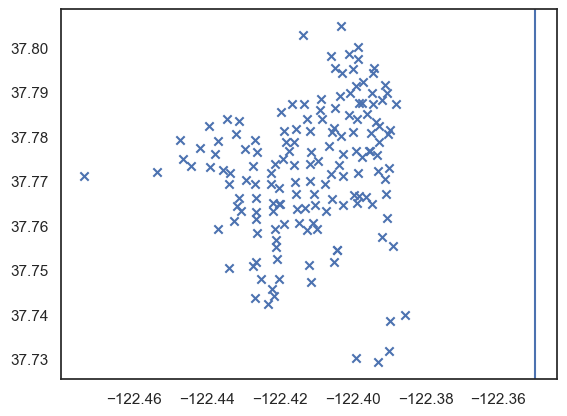

In [28]:
#plot the end_stations locations to see the outliers
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)
plt.show()

We will drop the rows where the bikes have left the San Francisco area, because our model also predicts on the data from San Francisco area

In [29]:
#rows that we will drop from the san_fran_df_geo
rows_to_drop = san_fran_df[san_fran_df['end_station_lon'] > -122.35]
rows_to_drop

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist


In [30]:
#drop the rows
san_fran_df.drop(rows_to_drop.index, inplace=True)

In [31]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,0,1.464568
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,0,2.034235
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,0,1.872159
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,0,1.068203
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,2,2.067894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359869,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,2,0 days 02:15:45,0.690035,2.390883,0,2.383096
1359870,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,2,0 days 01:50:53,1.402139,1.261757,0,1.481856
1359871,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,2,0 days 01:43:51,1.695992,0.607074,1,2.712250
1359872,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,2,0 days 01:19:27,1.291739,2.726417,1,0.547089


largest outliers in station_distance: [8.288831474684486, 7.865899391796463, 7.745730054682276, 7.500420107580924, 7.489437180808874, 7.449095270579806, 7.444763915123908, 7.432497537701852, 7.369841455423831, 7.338955225897247]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1526957161289509, 0.1596110645456167, 0.1619709513194011]


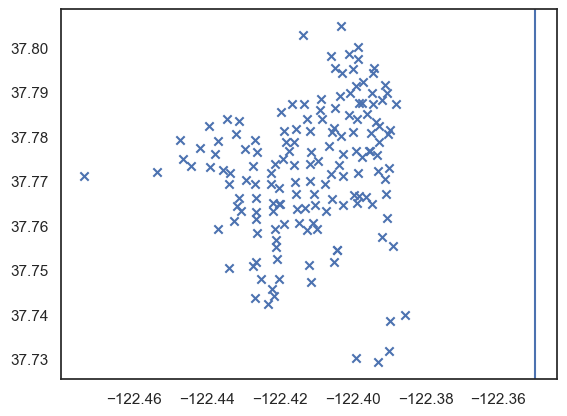

In [32]:
#check if the drop worked by ploting the station locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)
check_outlier('station_distance')

# Feature selection using the Pearson's correlation coefficient via f_regression
The **f_regression** is derived from the **r_regression**, which uses the Pearsons's r or also called the Pearson's correlation coefficient for performing F-test on selected features. **f_regression** is a scoring function used in feature selection procedure. It could also be used in `sklearn's` `SelectKBest` class to select the features all at once. The computed cross_correlation between regressor and target is then converted to an 
*F score* and then to a *p-value*.

The *F score* is computed from the *R^2*. Bigger *R^2* values lead to higher values of *F* -> the higher the *F score* is the better.

In [33]:
from sklearn.feature_selection import f_regression
def feature_selection(f):
    """ 
    Uses Pearson's correlation coefficient via f_regression
    f = feature that is examined
    """
    X = san_fran_df[f].values.reshape(-1,1)
    y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
    # Apply f_regression
    f_scores, p_values = f_regression(X, y)
    # Print results
    print("F-scores:", f_scores)
    print("p-values:", p_values)
    

In [34]:
def relation_to_idle_time(f):
    """
    Creates a scatter plot that shows that plots a selected feature against idle_time
    """
    x=san_fran_df[f]
    y=san_fran_df['idle_time'].dt.total_seconds() / 60.0
    plt.scatter(x,y , marker='x', linewidths=0.1)
    plt.xlabel(f)
    plt.ylabel('idle_time (min)')
    plt.show()

In [35]:
#drop NaT values from the idle_time column (one for every unique bike ID - the first rental in the year)
san_fran_df.dropna(subset=['idle_time'], inplace=True)

In [36]:
san_fran_df['idle_time']

0         0 days 01:32:38
1         0 days 19:49:39
2         0 days 07:33:35
3         0 days 03:10:19
4         0 days 00:12:10
                ...      
1359869   0 days 01:16:38
1359870   0 days 02:15:45
1359871   0 days 01:50:53
1359872   0 days 01:43:51
1359873   0 days 01:19:27
Name: idle_time, Length: 1359874, dtype: timedelta64[ns]

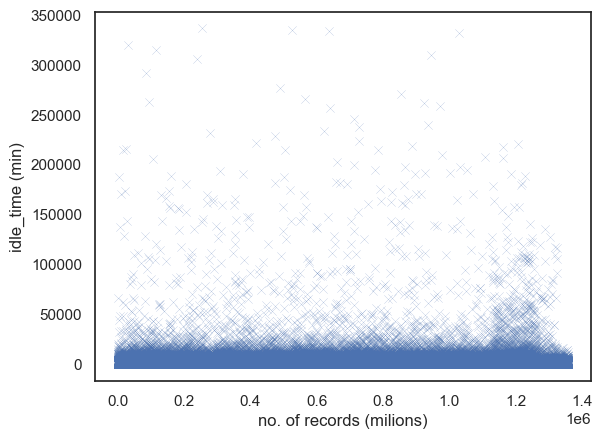

In [97]:
#plotting every record of idle_time 
y=san_fran_df['idle_time'].dt.total_seconds() / 60.0
x=np.arange(len(y))
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.xlabel('no. of records (milions)')
plt.ylabel('idle_time (min)')
plt.show()

### Understanding the relationship between idle_time and station_distance

In [37]:
feature_selection('station_distance')

F-scores: [776.27636023]
p-values: [8.67605973e-171]


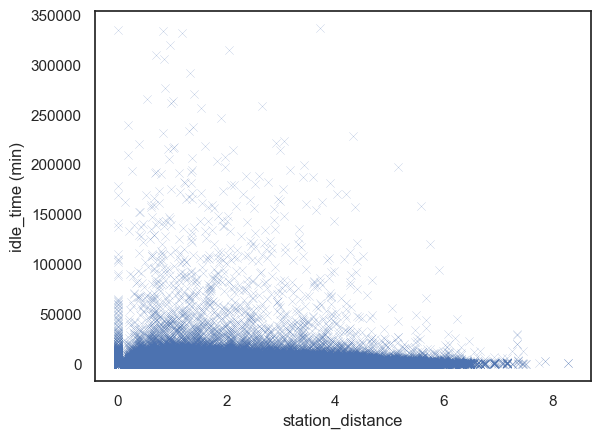

In [38]:
relation_to_idle_time('station_distance')

Text(0, 0.5, 'number of trips')

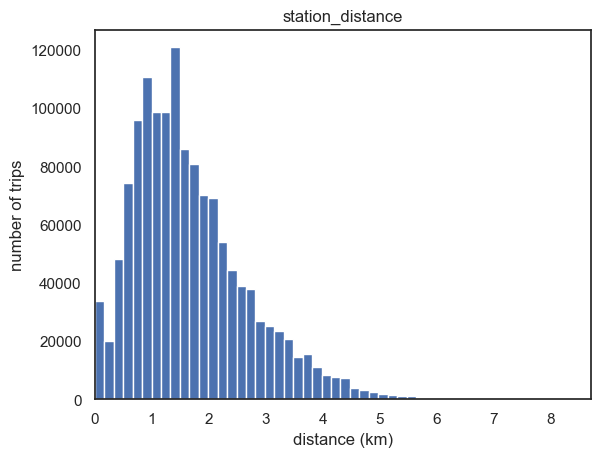

In [39]:
x = san_fran_df['station_distance']
plt.hist(x, bins=50)
plt.xlim(left=0)  # Set the lower and upper limits for the x-axis
plt.title('station_distance')
plt.xlabel('distance (km)')
plt.ylabel('number of trips')

While there may be some correlation between the idle_time and the station_disctance the trends are not that visible therefore we will not use this feature for the prediction of idle_time.

### Understanding the relationship between idle_time and trip_duration


In [40]:
feature_selection('trip_duration')

F-scores: [58.33182742]
p-values: [2.215759e-14]


In [41]:
x = san_fran_df['trip_duration'].dt.total_seconds() / 60.0
y = san_fran_df['idle_time'].dt.total_seconds() / 60.0

In [42]:
san_fran_df['trip_duration'].mean()

Timedelta('0 days 00:14:39.045767475')

Text(0, 0.5, 'idle_time (min)')

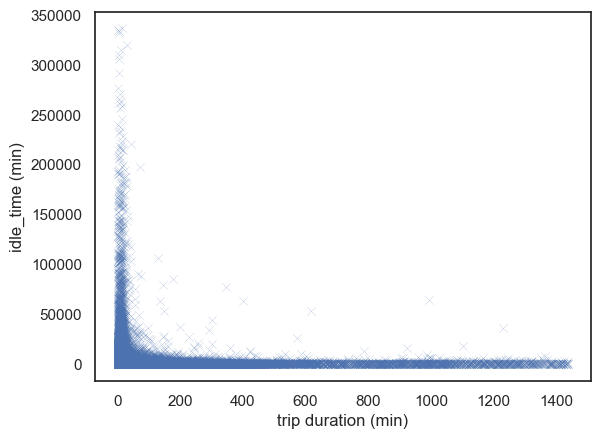

In [43]:
plt.scatter(x, y, marker='x', linewidths=0.1)
plt.xlabel('trip duration (min)')
plt.ylabel('idle_time (min)')

This shows that the feature is not significant for the prediction of idle_time.

### Understanding the relationship between idle_time and start_temperature

In [44]:
feature_selection('start_temperature')

F-scores: [2897.50052353]
p-values: [0.]


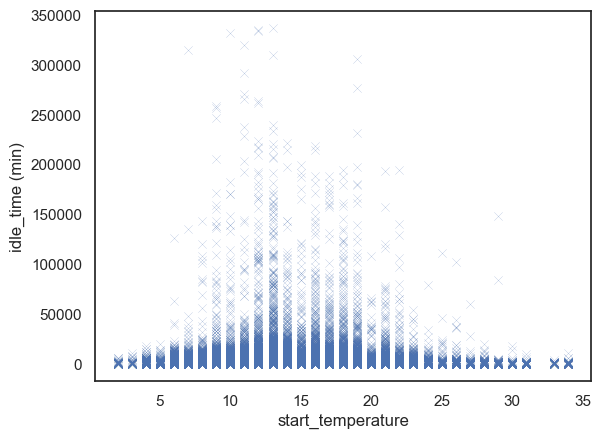

In [45]:
relation_to_idle_time('start_temperature')

Start temperature could be a good candidate for a predictor feature.

### Understanding the relationship between idle_time and Weekday

In [46]:
feature_selection('Weekday')

F-scores: [143.25605506]
p-values: [5.18689241e-33]


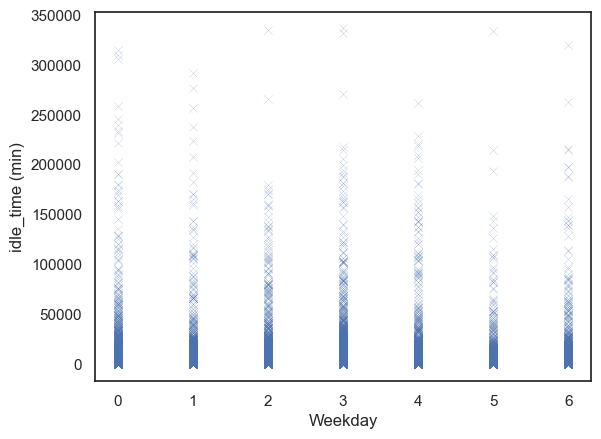

In [47]:
relation_to_idle_time('Weekday')

### Understanding the relationship between idle_time and Is_Weekend

In [48]:
feature_selection('Is_Weekend')

F-scores: [1028.54256952]
p-values: [1.36399226e-225]


Let's also try Weekday:

In [114]:
feature_selection('Weekday')

F-scores: [143.25605506]
p-values: [5.18689241e-33]


Not significant at all.

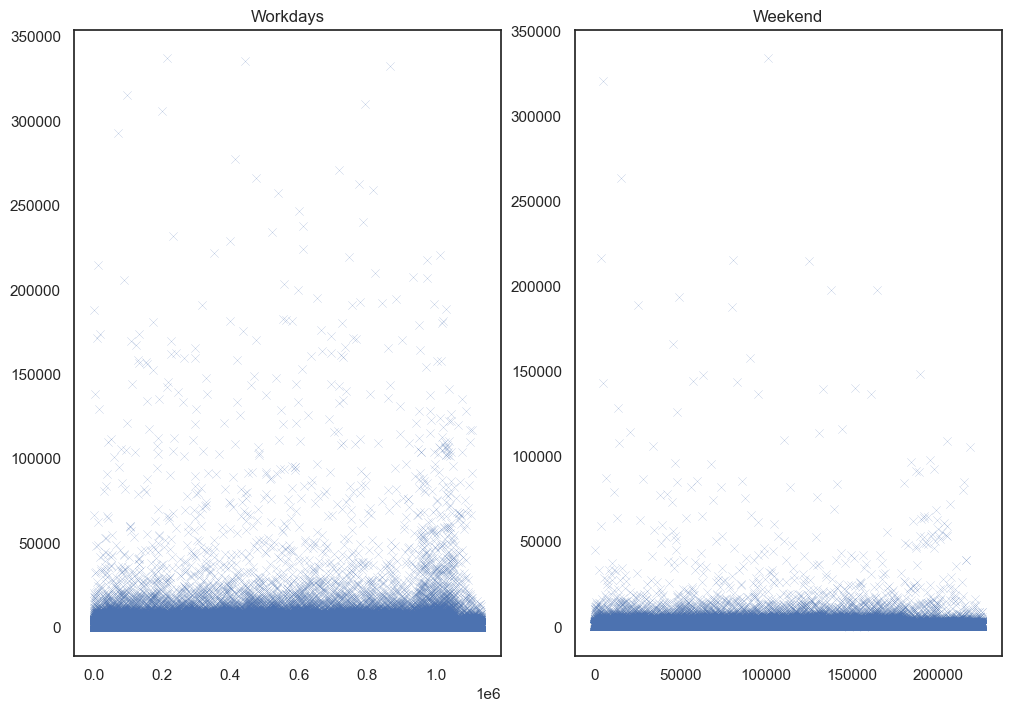

In [111]:
#plot the differences between idle_time and workday x weekend
y_1 = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time'].dt.total_seconds()/60
x_1 = np.arange(len(y_1))
y_2 = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time'].dt.total_seconds() /60
x_2 = np.arange(len(y_2))

fig, axs = plt.subplots(1,2, figsize=(10,7),constrained_layout=True)
axs[0].scatter(x_1,y_1, marker='x', linewidths=0.1)
axs[0].set_title('Workdays')
axs[1].scatter(x_2,y_2, marker='x', linewidths=0.1)
axs[1].set_title('Weekend')
plt.show()

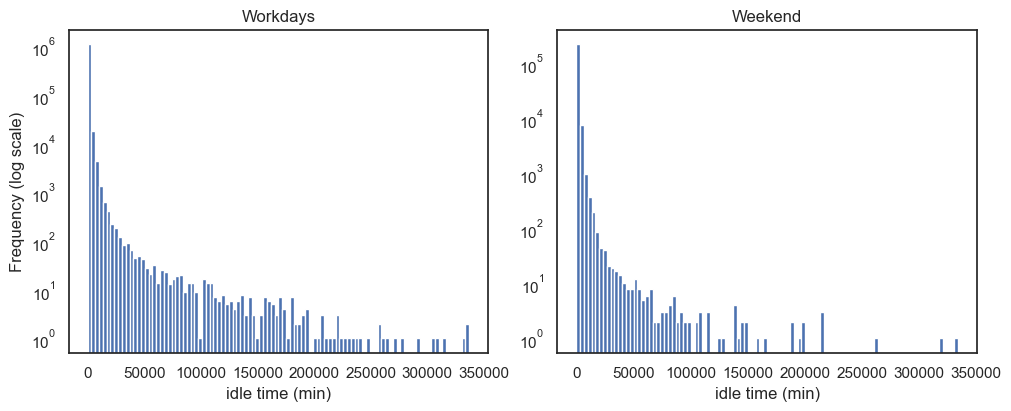

In [110]:
y_1 = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time'].dt.total_seconds()/60
x_1 = np.arange(len(y_1))
y_2 = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time'].dt.total_seconds() /60
x_2 = np.arange(len(y_2))
fig, axs = plt.subplots(1,2, figsize=(10,4),constrained_layout=True)
axs[0].hist(y_1, bins=100,log=True)
axs[0].set_title('Workdays')
axs[0].set_ylabel('Frequency (log scale)')
axs[0].set_xlabel('idle time (min)')
axs[1].hist(y_2, bins=100,log=True)
axs[1].set_title('Weekend')
axs[1].set_xlabel('idle time (min)')
plt.show()

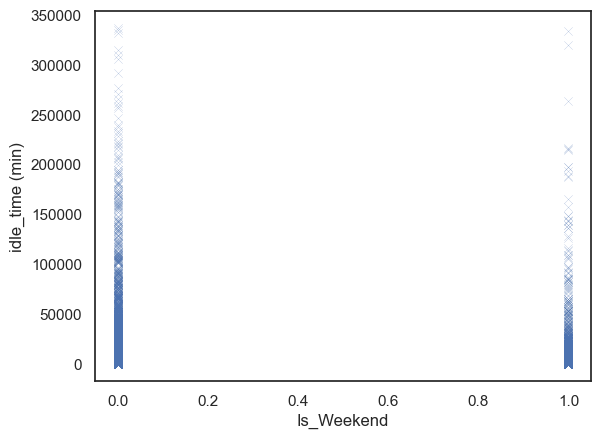

In [49]:
relation_to_idle_time('Is_Weekend')

We can see that idle_time is on average lower during the weekend.

There may be some influence between the day of the week and idle_time, although it is not significant enough for the purposes of idle_time prediciton.



### Understanding the relationship between idle_time and rain_start

In [50]:
feature_selection('rain_start')

F-scores: [18.36857621]
p-values: [1.82047987e-05]


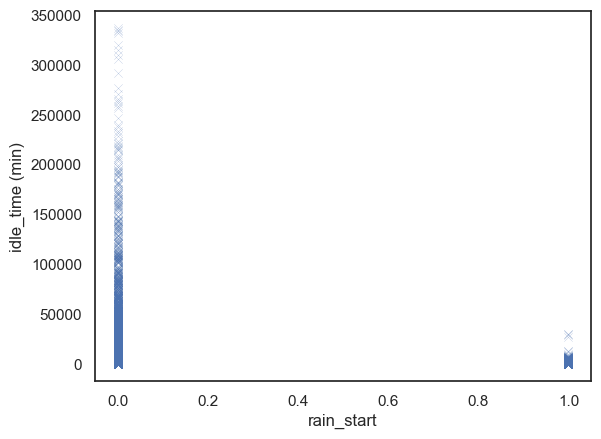

In [51]:
relation_to_idle_time('rain_start')

### Understanding the relationship between idle_time and start_precipitation

In [53]:
feature_selection('start_precipitation')

F-scores: [155.35078657]
p-values: [1.17893037e-35]


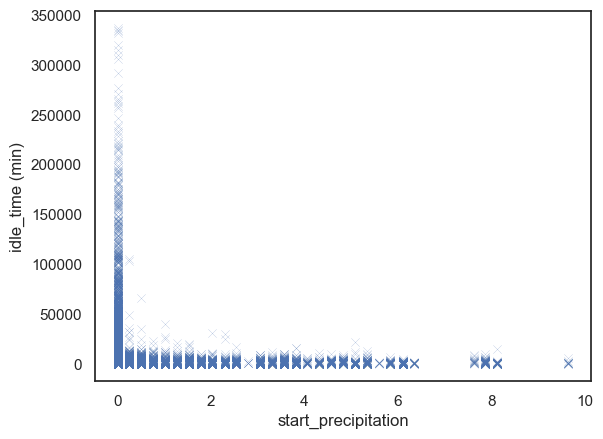

In [54]:
relation_to_idle_time('start_precipitation')

It seems that precipitation is not good predictor for the idle_time in San Francisco

### Understanding the relationship between idle_time and start_station_central_station_dist

In [55]:
feature_selection('start_station_central_station_dist')

F-scores: [5137.28843329]
p-values: [0.]


The F-score is really high which indicated that it may be a good predictor.

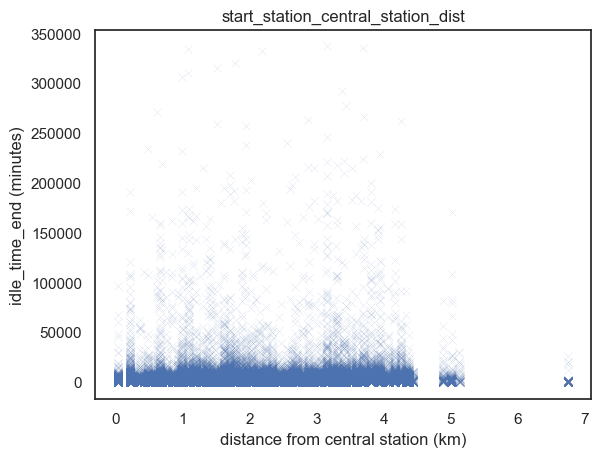

In [132]:
x= san_fran_df['start_station_central_station_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.05)
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('idle_time_end (minutes)')

plt.show()

Text(0, 0.5, 'number of trips')

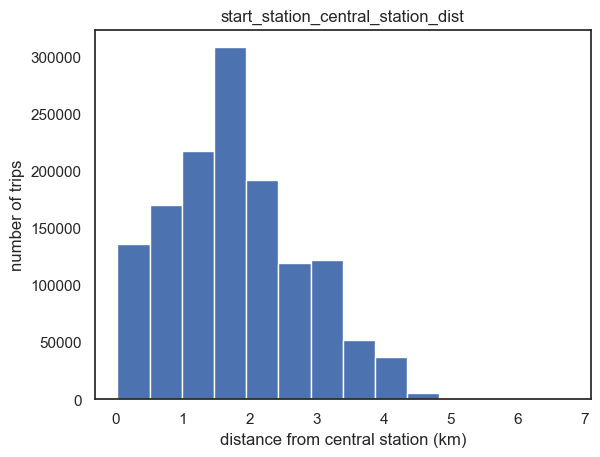

In [133]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['start_station_central_station_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('number of trips')

In [57]:
#try to plot it using the distance to mean and median
data = san_fran_df['idle_time']
mean_raw = data.mean()
mean = data.mean().total_seconds() / 60.0
centered_data_mean = data.dt.total_seconds() / 60.0 - mean
median_raw = data.median()
median = data.median().total_seconds()/60.0
centered_data_median = data.dt.total_seconds() / 60.0 - median
print("mean in timedelata dtype:",mean_raw)
print("mean in minutes:",mean)
print("median in timedelata dtype:",median_raw)
print("median in minutes:",median)

print(centered_data_mean)


mean in timedelata dtype: 0 days 09:26:30.171383525
mean in minutes: 566.5028563833333
median in timedelata dtype: 0 days 01:51:13
median in minutes: 111.21666666666667
0         -473.869523
1          623.147144
2         -112.919523
3         -376.186190
4         -554.336190
              ...    
1359869   -489.869523
1359870   -430.752856
1359871   -455.619523
1359872   -462.652856
1359873   -487.052856
Name: idle_time, Length: 1359874, dtype: float64


(-20000.0, 353184.9521436167)

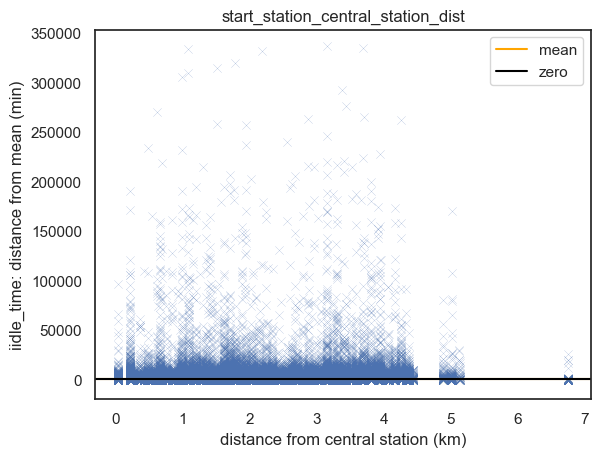

In [58]:
#plot the centered_data_mean distribution
x= san_fran_df['start_station_central_station_dist']
y_centered = centered_data_mean
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

(-1000.0, 40000.0)

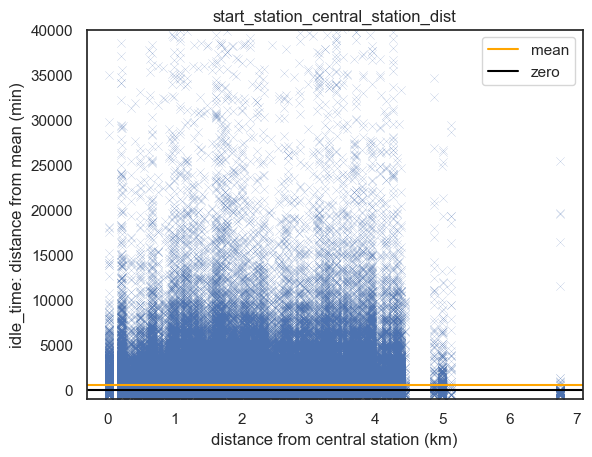

In [59]:
#show idle_time distance from mean < 40000
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
plt.ylim(-1000, 40000)

### Understanding the relationship between idle_time and start_station_ferry_building_dist

In [61]:
feature_selection('start_station_ferry_building_dist')

F-scores: [8035.85880936]
p-values: [0.]


The high F-score indicates a very strong correlation between with idle_time.

Text(0, 0.5, 'idle_time (minutes)')

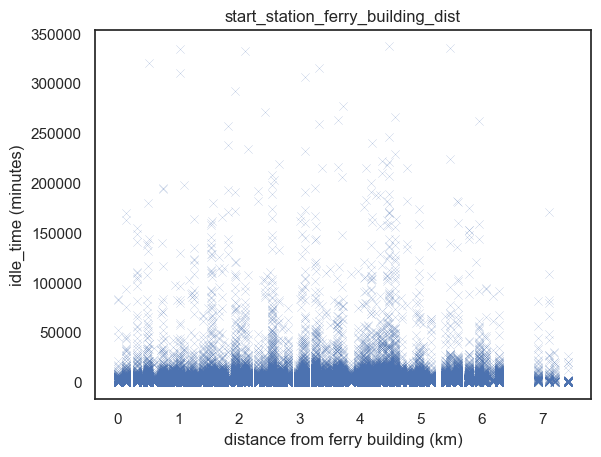

In [62]:
x= san_fran_df['start_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('idle_time (minutes)')

Text(0, 0.5, 'number of trips')

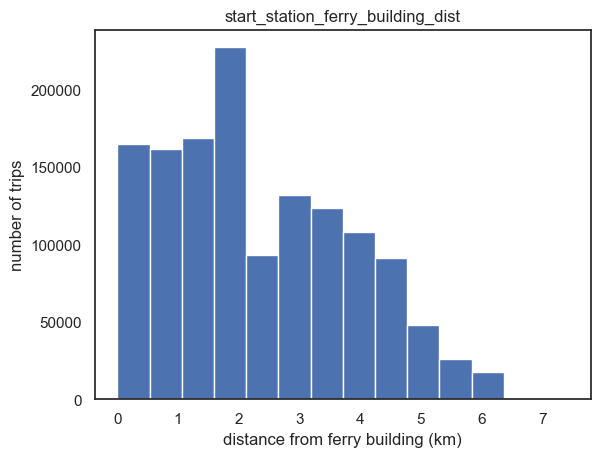

In [63]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['start_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('number of trips')

(-20000.0, 353184.9521436167)

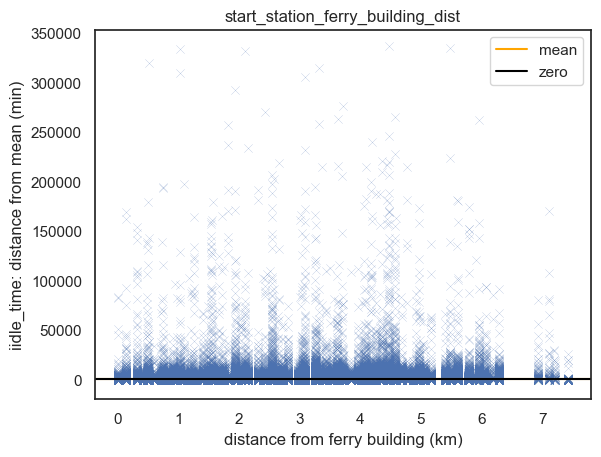

In [64]:
#plot the centered_data distribution
x= san_fran_df['start_station_ferry_building_dist']
y_centered = centered_data_mean
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

(-1000.0, 40000.0)

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


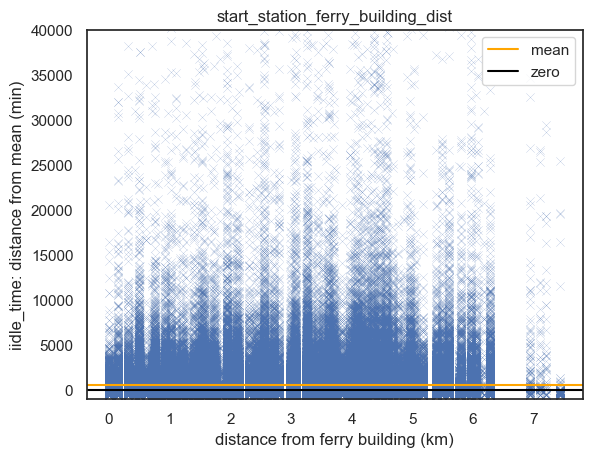

In [65]:
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-1000, 40000)

### start_station_twitter_HQ_dist

In [66]:
feature_selection('start_station_twitter_HQ_dist')

F-scores: [37.7325832]
p-values: [8.11602693e-10]


This shows that there is no big correlation between **idle_time** and the **start_station_twitter_HQ_dist**

(-20000.0, 353184.9521436167)

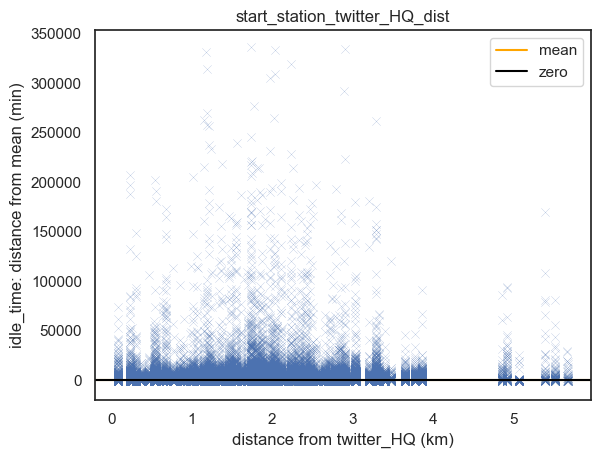

In [139]:
x= san_fran_df['start_station_twitter_HQ_dist']
y_centered = centered_data_mean
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_twitter_HQ_dist')
plt.xlabel('distance from twitter_HQ (km)')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

Text(0, 0.5, 'number of trips')

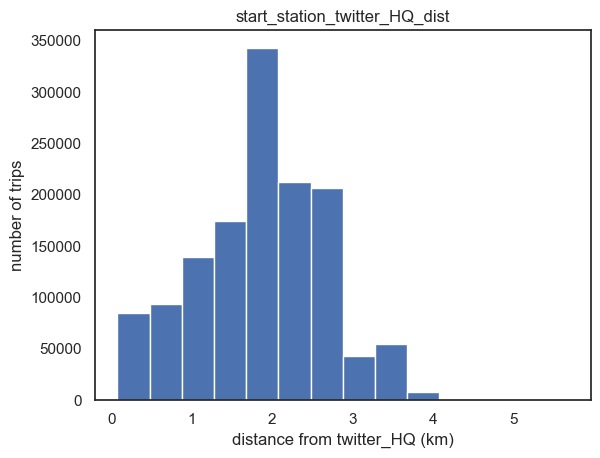

In [138]:
x= san_fran_df['start_station_twitter_HQ_dist']
plt.hist(x, bins=14)
plt.title('start_station_twitter_HQ_dist')
plt.xlabel('distance from twitter_HQ (km)')
plt.ylabel('number of trips')

### Understanding the relationship between idle_time and start_felt_temperature

In [68]:
feature_selection('start_felt_temperature')

F-scores: [3009.82581533]
p-values: [0.]


The F-score of start_felt_temperature is a little better than the start_temperature.

Text(0, 0.5, 'idle_time /minutes')

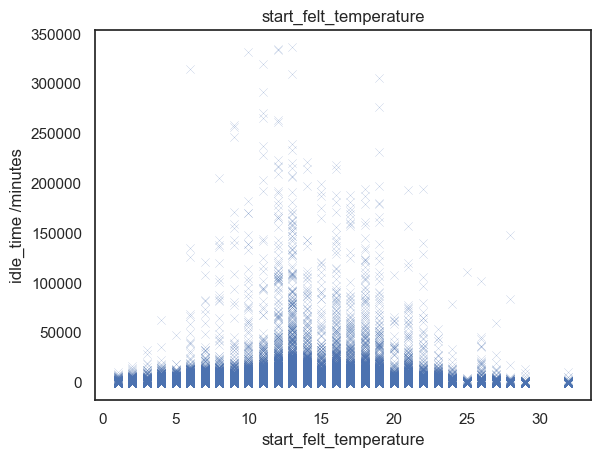

In [69]:
#plotting the start_felt_temperature and idle_time to examine the values
x= san_fran_df['start_felt_temperature']
y_1= san_fran_df['idle_time'].dt.total_seconds() / 60.0
fig,ax = plt.subplots()
ax.scatter(x,y_1, marker='x', linewidths=0.1)
ax.set_title('start_felt_temperature')
ax.set_xlabel('start_felt_temperature')
ax.set_ylabel('idle_time /minutes')


This shows that there apears to be longer idle times when the temperatures are between 10 and 20 degrees Celsius. Let's investigate what may be the reason.

We check the distribution of the start_felt_temperature.

Text(0, 0.5, 'number of trips')

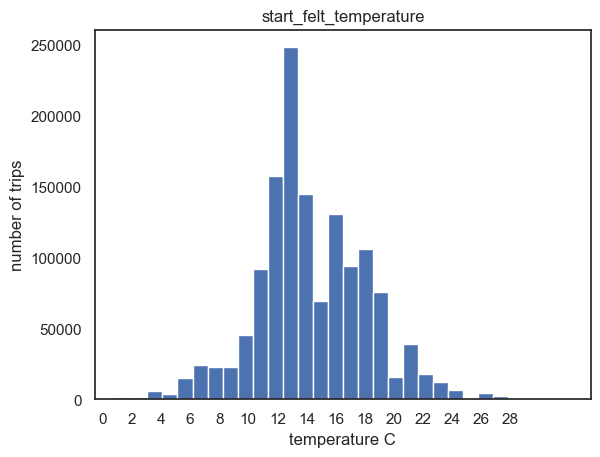

In [70]:
#check the distribution of the start_felt_temperature
x= san_fran_df['start_felt_temperature']
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('start_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

This shows that in the same temperature window 10-20 Celsius the number of trips are also the largest.

We now look at the trip duration to confirm the assumption that in the temperature window 10-20 Celsius people make more trips that take more time because they are enjoying the mild weather.

Text(0, 0.5, 'trip_duration (min)')

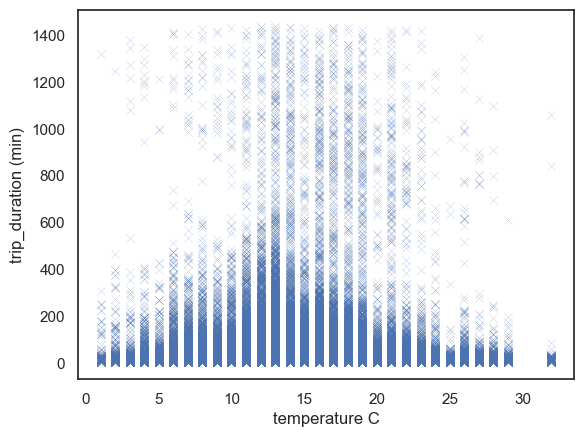

In [137]:
#we now have a look at the relation ship between trip_duration and start_felt_temperature
y = san_fran_df['trip_duration'].dt.total_seconds()/60.0
x = san_fran_df['start_felt_temperature']

plt.scatter(x,y, marker='x', linewidths=0.1)
plt.xlabel('temperature C')
plt.ylabel('trip_duration (min)')

The above graph confirms our hypothesis that people indeed make longer trips in the 10-20 Celsius temperature window.

To understand why the idle time of bikes, the trip duration and number of trips are larger when the temperature is between 10 and 20 degrees Celsius, we can look at the distributions of the start_felt_temperature variable and look at the relationship between start_time and start_felt_temperature variables.  

One of the reasons for a larger idle_time is that with more usage of the bikes the probability that the bike will break down/get lost/get stolen is higher, which leads to the bikes not beeing used and racking up long amounts of idle time, such as 200+ days in extreme situations.

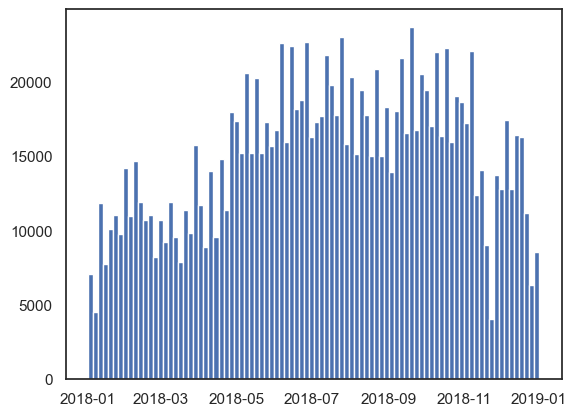

In [72]:
#look at the number of trips in relation to start_time
x_time=san_fran_df['end_time']
x_temperature=san_fran_df['start_felt_temperature']

plt.hist(x_time, bins=90)
plt.show()

We now examine the relation between numbers of trips and the temperature.

In [73]:
#have a look at the values of the start_felt_temperature column
san_fran_df['start_felt_temperature'].describe()

count    1.359874e+06
mean     1.438938e+01
std      3.716500e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.400000e+01
75%      1.700000e+01
max      3.200000e+01
Name: start_felt_temperature, dtype: float64

The average felt temperature is 14.3 degrees and the majority (more than half) of the values is in the (10, 15) interval, more than 75% of the all trips have been made in the  (10, 20) temperature interval.

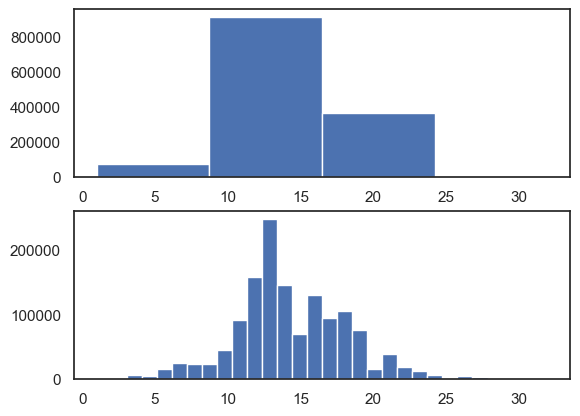

In [74]:
#look at the number of trips in relation to temperature
fig, ax = plt.subplots(2,1)
ax[0].hist(x_temperature, bins=4)
ax[1].hist(x_temperature, bins=30)
plt.show()

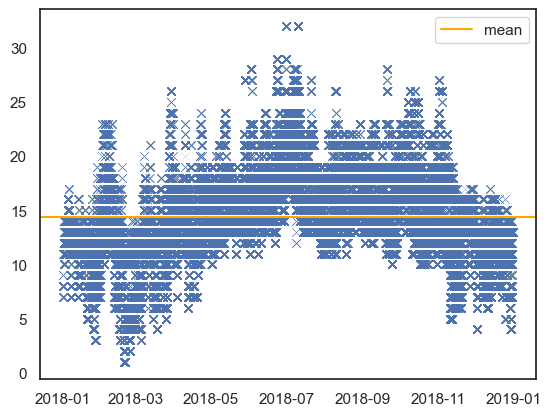

In [75]:
#look at the relation between start_time and start_felt_temperature

plt.scatter(x_time,x_temperature,  marker='x', linewidths=0.1)
plt.axhline(14.38, color='orange', label='mean')
plt.legend()
plt.show()

Thanks to this scatter plot we can now understand why the idle_time of the bikes appears to be, when looking at the scatter plots that display the relationship between the idle_time and start_felt_temperature, the longest in the the (10, 20) temperature interval. 

It is due to the mild weather climate that the most trips are made during this temperature interval hence there is also large idle_time.

In the more extreme temperatures the idle_time is lower due to the fact that the bikes are actually not beeing rented out, therefore the idle_time is just racking up without beeing recorded. The idle_time is recorded only when a new trip is started, which happens understandibly when the weather is nice, in our case between 10 and 20 degrees.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


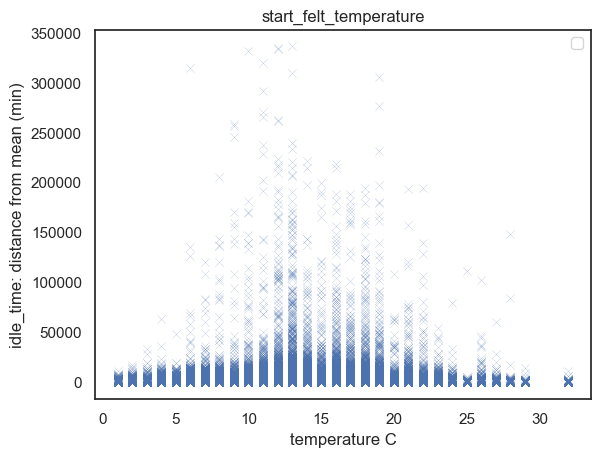

In [136]:
x=san_fran_df['start_felt_temperature']
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
#plt.axhline(566.5028563833333, color="orange", label="mean")
#plt.axhline(0, color="black", label="zero")
plt.title('start_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
#plt.ylim(-3000, 60000)

### end_felt_temperature

In [77]:
feature_selection('end_felt_temperature')

F-scores: [3115.83887915]
p-values: [0.]


end_felt_temperature is a better predictor for idle_time than start_felt_temperature, it makes sense due to the nature of the idle time, where it naturally depends more on the temperature at the end of the ride, rather than at the beginning

Text(0, 0.5, 'idle_time /minutes')

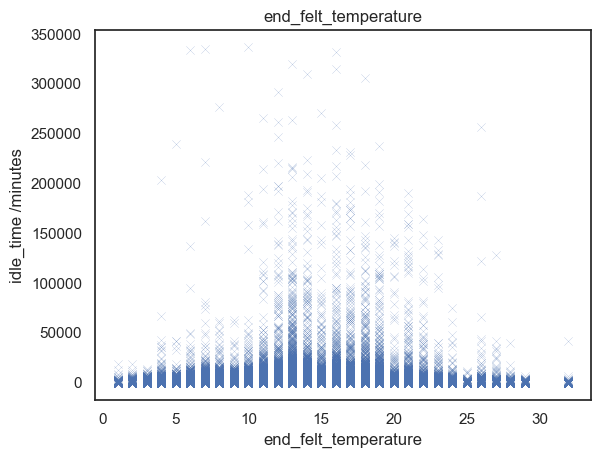

In [78]:
x= san_fran_df['end_felt_temperature']
y= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.title('end_felt_temperature')
plt.xlabel('end_felt_temperature')
plt.ylabel('idle_time /minutes')

Text(0, 0.5, 'number of trips')

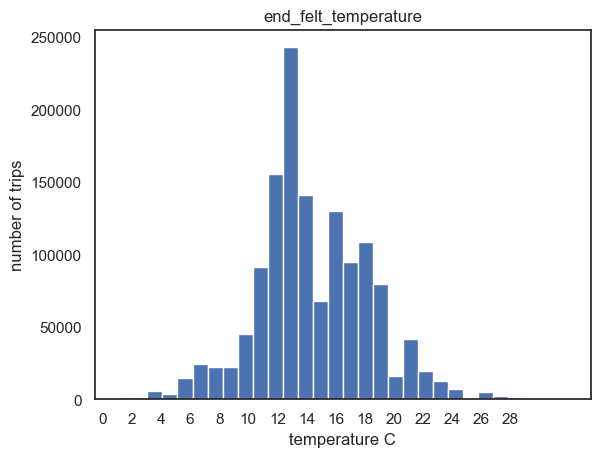

In [79]:
#check the distribution of the start_felt_temperature
x= san_fran_df['end_felt_temperature']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('end_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

### start_cloud_cover

In [80]:
feature_selection('start_cloud_cover')

F-scores: [420.00843049]
p-values: [2.51049799e-93]


start_cloud_cover is not a good predictor of idle_time

## Using the SelectKBest class from sklearn

In [142]:
#try to choose the best feature for predicting of idle_time by using the selectKBest class from sklearn
from sklearn.feature_selection import SelectKBest
x = san_fran_df[['start_temperature', 'end_temperature',
                 'start_cloud_cover', 'end_cloud_cover',
                 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 
                 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature', 'Weekday', 'Is_Weekend',
                 'temperature_dif','rain_start', 'station_distance', 'start_station_central_station_dist',
                 'start_station_ferry_building_dist', 'start_station_twitter_HQ_dist']]
y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
print("Feature data dimension:", x.shape)
select = SelectKBest(score_func=f_regression, k=10)
x_selected = select.fit_transform(x,y)
print("After selecting best 10 features:", x_selected.shape) 

Feature data dimension: (1359874, 20)
After selecting best 10 features: (1359874, 10)


In [143]:
selected_indices = select.get_support(indices=True)

# Get the names of the selected features
selected_features = [x.columns[idx] for idx in selected_indices]
selected_values = pd.DataFrame(x_selected, columns=selected_features)
selected_scores = select.scores_[selected_indices]
selected_feature_scores = pd.DataFrame({"Feature": selected_features, "Score": selected_scores})
print("Selected features with scores:")
print(selected_feature_scores)


Selected features with scores:
                              Feature        Score
0                   start_temperature  2897.500524
1                     end_temperature  3002.158492
2                   start_cloud_cover   420.008430
3                     end_cloud_cover   442.421961
4              start_felt_temperature  3009.825815
5                end_felt_temperature  3115.838879
6                          Is_Weekend  1028.542570
7                    station_distance   776.276360
8  start_station_central_station_dist  5137.288433
9   start_station_ferry_building_dist  8035.858809


The SelectKBest class form sklearn show us that the features with the biggest correlation with idle_time are the distance to the points of interest that we have chosen using the visual map exploration of the stations and their respective numbers of interactions. For the prediction model we will use the two distance features: **start_station_central_station_dist,start_station_ferry_building_dist** and the **end_felt_temperature feature**.

## Building the prediction models:

# 1) Linear regression